In [134]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [135]:
# To find a slope of price line 
def indSlope(series,n):
    
    array_sl = [j*0 for j in range(n-1)]
    
    for j in range(n,len(series)+1):
        y = series[j-n:j]
        x = np.array(range(n))
        x_sc = (x - x.min())/(x.max() - x.min())
        y_sc = (y - y.min())/(y.max() - y.min())
        x_sc = sm.add_constant(x_sc)
        model = sm.OLS(y_sc,x_sc)
        results = model.fit()
        array_sl.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(array_sl))))
    return np.array(slope_angle)

In [136]:
# True Range and Average True Range indicator

def indATR(source_DF,n):
    df = source_DF.copy()
    df['H-L']=abs(df['high']-df['low'])
    df['H-PC']=abs(df['high']-df['close'].shift(1))
    df['L-PC']=abs(df['low']-df['close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df_temp = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df_temp

In [137]:
# generate data frame with all needed data

def PrepareDF(DF):
    ohlc = DF.iloc[:,[0,1,2,3,4]]
    ohlc.columns = ["date","open","high","low","close"]
    ohlc=ohlc.set_index('date')
    df = indATR(ohlc,14).reset_index()
    df['slope'] = indSlope(df['close'],5)
    df['channel_max'] = df['high'].rolling(10).max()
    df['channel_min'] = df['low'].rolling(10).min()
    df['position_in_channel'] = (df['close']-df['channel_min']) / (df['channel_max']-df['channel_min'])
    df = df.set_index('date')
    df = df.reset_index()
    return(df)


In [138]:
# find local mimimum / local maximum

def isLCC(DF,i):
    df=DF.copy()
    LCC=0
    
    if df['close'][i]<=df['close'][i+1] and df['close'][i]<=df['close'][i-1] and df['close'][i+1]>df['close'][i-1]:
        #найдено Дно
        LCC = i-1;
    return LCC

def isHCC(DF,i):
    df=DF.copy()
    HCC=0
    if df['close'][i]>=df['close'][i+1] and df['close'][i]>=df['close'][i-1] and df['close'][i+1]<df['close'][i-1]:
        #найдена вершина
        HCC = i;
    return HCC





In [139]:
def getMaxMinChannel(DF, n):
    maxx=0
    minn=DF['low'].max()
    for i in range (1,n):
        if maxx<DF['high'][len(DF)-i]:
            maxx=DF['high'][len(DF)-i]
        if minn>DF['low'][len(DF)-i]:
            minn=DF['low'][len(DF)-i]
    return(maxx,minn)

In [140]:
apiKey='rnCNMZPEwcbLfN-VMHSe'

interval_var = '5min'
symbol='ETHUSD'

path=f'https://marketdata.tradermade.com/api/v1/timeseries?currency=ETHUSD&api_key=rnCNMZPEwcbLfN-VMHSe&start_date=2022-12-21&end_date=2022-12-23&format=records&interval=minute&period=5'
# path='https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol='+symbol+'&market=USD&interval='+interval_var+'&apikey='+apiKey+'&datatype=csv&outputsize=full'
df = pd.read_json('etc.json')
df.to_csv('etc.csv')

In [141]:
df

,close,date,high,low,open
0,1217.15002,2022-12-21 00:00:00,1217.52002,1215.87000,1216.32495
1,1217.68994,2022-12-21 00:05:00,1218.63000,1216.81006,1217.10998
2,1212.10998,2022-12-21 00:10:00,1217.72998,1210.94995,1217.66992
3,1211.68994,2022-12-21 00:15:00,1212.66003,1209.20508,1212.16504
4,1211.58997,2022-12-21 00:20:00,1212.17505,1209.58997,1211.72998
...,...,...,...,...,...
570,1217.30005,2022-12-22 23:40:00,1217.88000,1216.87988,1217.59998
571,1217.69995,2022-12-22 23:45:00,1217.72998,1216.46997,1217.30505
572,1217.48999,2022-12-22 23:50:00,1217.81995,1216.82007,1217.69495
573,1217.50000,2022-12-22 23:55:00,1217.63000,1216.55005,1217.52002


In [153]:
df = df.loc[:, ['date', 'open', 'high', 'low', 'close']]

In [168]:
df.to_csv('etc.csv')

In [169]:
df

,date,open,high,low,close
0,2022-12-21 00:00:00,1216.32495,1217.52002,1215.87000,1217.15002
1,2022-12-21 00:05:00,1217.10998,1218.63000,1216.81006,1217.68994
2,2022-12-21 00:10:00,1217.66992,1217.72998,1210.94995,1212.10998
3,2022-12-21 00:15:00,1212.16504,1212.66003,1209.20508,1211.68994
4,2022-12-21 00:20:00,1211.72998,1212.17505,1209.58997,1211.58997
...,...,...,...,...,...
570,2022-12-22 23:40:00,1217.59998,1217.88000,1216.87988,1217.30005
571,2022-12-22 23:45:00,1217.30505,1217.72998,1216.46997,1217.69995
572,2022-12-22 23:50:00,1217.69495,1217.81995,1216.82007,1217.48999
573,2022-12-22 23:55:00,1217.52002,1217.63000,1216.55005,1217.50000


In [155]:
prepared_df=PrepareDF(df)

In [165]:
prepared_df[0:50]

,date,open,high,low,close,TR,ATR,slope,channel_max,channel_min,position_in_channel
0,2022-12-21 00:00:00,1216.32495,1217.52002,1215.87000,1217.15002,NaN,NaN,0.000000,NaN,NaN,NaN
1,2022-12-21 00:05:00,1217.10998,1218.63000,1216.81006,1217.68994,1.81994,NaN,0.000000,NaN,NaN,NaN
2,2022-12-21 00:10:00,1217.66992,1217.72998,1210.94995,1212.10998,6.78003,NaN,0.000000,NaN,NaN,NaN
3,2022-12-21 00:15:00,1212.16504,1212.66003,1209.20508,1211.68994,3.45495,NaN,0.000000,NaN,NaN,NaN
4,2022-12-21 00:20:00,1211.72998,1212.17505,1209.58997,1211.58997,2.58508,NaN,-48.306582,NaN,NaN,NaN
5,2022-12-21 00:25:00,1211.59497,1212.60998,1211.58997,1212.35998,1.02001,NaN,-36.245656,NaN,NaN,NaN
6,2022-12-21 00:30:00,1212.40002,1215.18005,1212.33997,1214.70996,2.84008,NaN,36.963894,NaN,NaN,NaN
7,2022-12-21 00:35:00,1214.69507,1215.55005,1211.46997,1211.64502,4.08008,NaN,21.230253,NaN,NaN,NaN
8,2022-12-21 00:40:00,1211.67004,1212.69995,1210.07996,1211.25000,2.61999,NaN,-9.160764,NaN,NaN,NaN
9,2022-12-21 00:45:00,1211.31006,1211.31006,1207.13000,1209.48999,4.18006,NaN,-35.183083,1218.63000,1207.13000,0.205217


<AxesSubplot:>

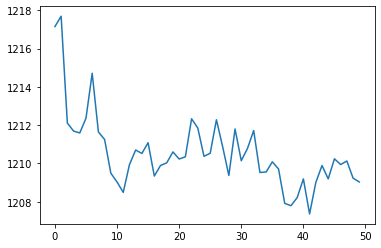

In [164]:
prepared_df[0:50]['close'].plot()

<AxesSubplot:>

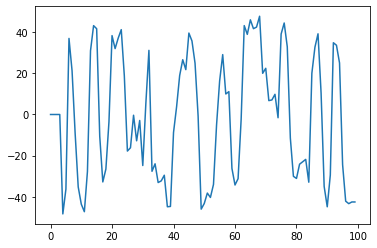

In [160]:
prepared_df[0:100]['slope'].plot()

<AxesSubplot:>

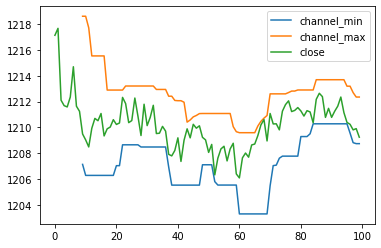

In [166]:
prepared_df[0:100][{'channel_max','channel_min','close'}].plot()

<AxesSubplot:>

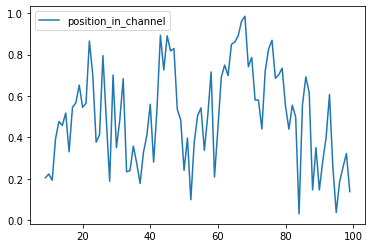

In [167]:
prepared_df[0:100][{'position_in_channel'}].plot()